# Estadistica Aplicada

## Andrik Daniel Vaquez Regalado - 1905622

### Actividad 5 - Marzo 2023 - Grupo: 043

In [54]:
# las de cajon
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
!pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
# librerias de supervivencia
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter

In [57]:
from google.colab import files

In [58]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import pandas as pd 
df = pd.read_excel("/content/drive/MyDrive/Estadistica_Aplicada/supervivencia_examenes.xlsx")
df.shape

(17, 5)

In [60]:
df.dtypes
print("\nLos datos son de tipo:\n", df.dtypes)


Los datos son de tipo:
 id                int64
tiempo            int64
examen            int64
calificación    float64
género           object
dtype: object


In [61]:
df.head()

,id,tiempo,examen,calificación,género
0,1,85,1,100.0,m
1,2,109,1,100.0,m
2,3,118,1,100.0,m
3,4,120,1,100.0,f
4,5,106,1,98.0,f


**Variables**

**id:** es un identificador de alumno.

**tiempo:** es el tiempo medido en minutos que tardaron en contestar el examen.

**examen:** toma el valor de 1 si entrego el examen y 0 sino lo entrego.

**calificación:** es la calificación recibida en el examen.

**género:** es m:masculino y f:femenino.

# a) ESTADISTICAS DESCRIPTIVAS
Calcule  el  tiempo  promedio  que  tardaron  en responder los alumnos el examen y la calificación promedio obtenida. El  profesor  sospecha  que  las  alumnas  responden  más  rápido  el  examen, calcule  el  tiempo  promedio  que  tardaron  en  responder  las  alumnas  y  su calificación  promedio,  asi  como  el  tiempo  promedio  que  tardaron  en responder los alumnos y su calificación promedio.

Elabore un print mostrando dichos resultados

In [62]:
# Estadisticas Descriptivas
df.describe()

,id,tiempo,examen,calificación
count,17.000000,17.000000,17.0,17.000000
mean,9.000000,107.352941,1.0,90.705882
std,5.049752,11.241337,0.0,9.642126
min,1.000000,85.000000,1.0,72.000000
25%,5.000000,103.000000,1.0,84.000000
50%,9.000000,109.000000,1.0,96.000000
75%,13.000000,116.000000,1.0,98.000000
max,17.000000,120.000000,1.0,100.000000


# RESPUESTA

In [63]:
print("La calificación promedio del examen de los alumnos fue de:", df["calificación"].mean())
print("El tiempo promedio que tardaron en responder el examen los alumnos es de:", df["tiempo"].mean())

La calificación promedio del examen de los alumnos fue de: 90.70588235294117
El tiempo promedio que tardaron en responder el examen los alumnos es de: 107.3529411764706


In [64]:
Mujeres = df[df["género"] == "f"]

In [65]:
Mujeres

,id,tiempo,examen,calificación,género
3,4,120,1,100.0,f
4,5,106,1,98.0,f
6,7,108,1,96.0,f
7,8,119,1,96.0,f
8,9,115,1,96.0,f
9,10,108,1,94.0,f
11,12,99,1,86.0,f
14,15,90,1,78.0,f


#RESPUESTA

In [66]:
print("La calificación promedio del examen de las mujeres fue de:" , Mujeres["calificación"].mean())
print("El tiempo promedio que tardaron en responder el examen las mujeres es de:" , Mujeres["tiempo"].mean())

La calificación promedio del examen de las mujeres fue de: 93.0
El tiempo promedio que tardaron en responder el examen las mujeres es de: 108.125


In [67]:
Hombres = df[df["género"] == "m"]

In [68]:
Hombres

,id,tiempo,examen,calificación,género
0,1,85,1,100.0,m
1,2,109,1,100.0,m
2,3,118,1,100.0,m
5,6,103,1,98.0,m
10,11,87,1,88.0,m
12,13,112,1,84.0,m
13,14,111,1,82.0,m
15,16,116,1,74.0,m
16,17,119,1,72.0,m


#RESPUESTA

In [69]:
print("La calificación promedio del examen de los Hombres fue de:" , Hombres["calificación"].mean())
print("El tiempo promedio que tardaron en responder el examen los Honbres es de:" , Hombres["tiempo"].mean())

La calificación promedio del examen de los Hombres fue de: 88.66666666666667
El tiempo promedio que tardaron en responder el examen los Honbres es de: 106.66666666666667


# Inciso b)
¿Cómo  crees  que  se  comporta  el  riesgo  de  entregar  el  examen  conforme transcurre  el  tiempo?  ¿es constante,  creciente,  o  decreciente?  Según  tu respuesta  ajusta  un  modelo  exponencial  o  Weibull,  primero  para  todos  los individuos y muestra la función de riesgo.

#RESPUESTA

Al graficar ambos modelos podemos apreciar distintos comportamientos de acorde al riesgo de entregar el examen, yo me quedaria con la Weibull ya que considero que el riesgo de entregar el examen conforme transcurre el tiempo deberia ser **creciente**.

In [70]:
from lifelines import WeibullFitter

In [71]:
weib1 = WeibullFitter().fit(df["tiempo"],df["examen"])

<Axes: >

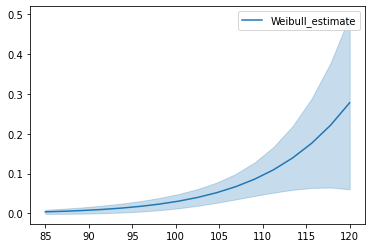

In [72]:
weib1.plot_hazard() #Entre mas tiempo pase el riesgo de que entregues el examen es mayor/creciente

In [73]:
weib1.hazard_ #Probabilidad de que entregues el examen

,Weibull_estimate
85.0000,0.004025
87.1875,0.005499
89.3750,0.007454
91.5625,0.010031
93.7500,0.013405
95.9375,0.017795
98.1250,0.023471
100.3125,0.030769
102.5000,0.040101
104.6875,0.051973


# Inciso c)
Ahora estima el mismo modelo que planteaste en el inciso anterior, pero para hombres  y  mujeres,  y  grafica  ambas  funciones  de  supervivencia  juntas (empalmadas), ¿gráficamente quien tarda más en entregar el examen?

In [74]:
weib_mujeres = WeibullFitter().fit(Mujeres["tiempo"],Mujeres["examen"])

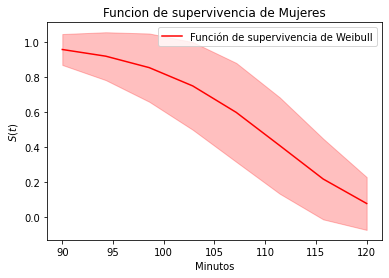

In [97]:
weib_mujeres.plot_survival_function(label="Función de supervivencia de Weibull", color="red");
plt.title("Funcion de supervivencia de Mujeres")
plt.ylabel("$S(t)$")
plt.xlabel("Minutos")
plt.show()

In [76]:
weib_hombres = WeibullFitter().fit(Hombres["tiempo"],Hombres["examen"])

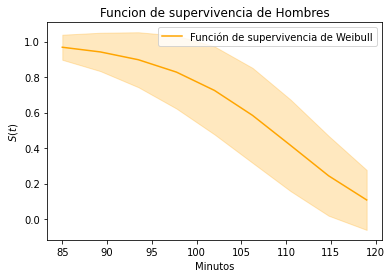

In [98]:
weib_hombres.plot_survival_function(label="Función de supervivencia de Weibull", color="orange");
plt.title("Funcion de supervivencia de Hombres")
plt.ylabel("$S(t)$")
plt.xlabel("Minutos")
plt.show()

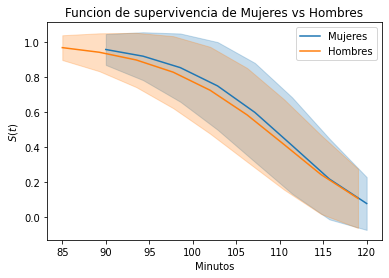

In [99]:
weib_mujeres.plot_survival_function(label = "Mujeres")
weib_hombres.plot_survival_function(label = "Hombres")
plt.title("Funcion de supervivencia de Mujeres vs Hombres")
plt.ylabel("$S(t)$")
plt.xlabel("Minutos")
plt.show()

# RESPUESTA

**Graficamente podemos apreciar que las mujeres se tardan más en entregar el examen que los hombres.**

# Inciso d)
Estime  la  función  de  supervivencia del  tiempo  de  entrega del  examen  de todos los alumnos utilizando Kaplan-Meier, muestre los valores de la función de supervivencia, los valores del intervalos de confianza al 95%, asi como la gráfica respectiva de la función de supervivencia con sus intervalos.

In [79]:
km_df = KaplanMeierFitter().fit(df["tiempo"], df["examen"])

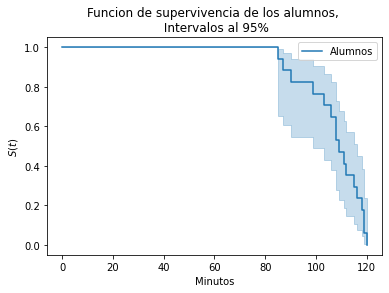

In [80]:
km_df.plot_survival_function(label="Alumnos")
plt.title("Funcion de supervivencia de los alumnos, \n Intervalos al 95%")
plt.ylabel("$S(t)$")
plt.xlabel("Minutos")
plt.show()

# Inciso e)
Realice  un  gráfico  donde  muestre  la  función  de  supervivencia de  Kaplan-Meier de los alumnos(m) y de las alumnas(f) con sus respectivos intervalos de confianza. Y comente con base en la gráfica si es posible que el profesor tenga razón respecto a que las alumnas responden más rápido el examen.

In [81]:
km_Mujeres = KaplanMeierFitter().fit(Mujeres["tiempo"], Mujeres["examen"])
km_Hombres = KaplanMeierFitter().fit(Hombres["tiempo"], Hombres["examen"])

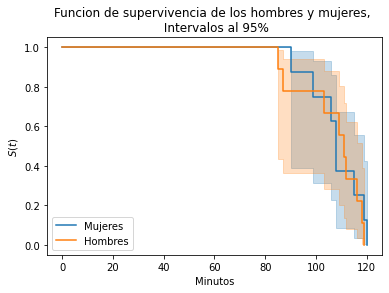

In [82]:
km_Mujeres.plot_survival_function(label="Mujeres")
km_Hombres.plot_survival_function(label="Hombres")
plt.title("Funcion de supervivencia de los hombres y mujeres, \n Intervalos al 95%")
plt.ylabel("$S(t)$")
plt.xlabel("Minutos")
plt.show()

# RESPUESTA
Graficamente podemos observar que ligeramente las mujeres tardan más en responder el examen, pero no podemos afirmarlo debido a los intervalos de confianza.

# Inciso f)
Realice  el  log  ranktest  para  probar  si  las  funciones  de  supervivencia  de alumnos  y  alumnas  para  responder  el  examen  son  iguales.  Comente  el resultado de la prueba de hipótesis y diga si el profesor tiene razón o no.

# HIPÓTESIS
H0: El tiempo que tardan en responder el examen tanto hombres como mujeres son iguales.

Ha: Que las mujeres tarden menos en responder el examen que los hombres.

In [83]:
from lifelines.statistics import logrank_test

In [84]:
lrt = logrank_test(Mujeres["tiempo"],Hombres["tiempo"],
                    Mujeres["examen"],Hombres["examen"])

In [85]:
lrt.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.15 0.69      0.53

In [86]:
lrt.summary

,test_statistic,p,-log2(p)
0,0.153807,0.694924,0.525074


#RESPUESTA

# Si P.Value <  $\alpha$, Rechazamos H0

# Conclusión: Con un 95% de confianza NO rechazamos H0, significa que las funciones de supervivencia de los hombres y mujeres son IGUALES.

# Inciso g)
El profesor tambien sospecha que quienes entregan el examen más rápido es porque  no  estudiaron,  por  tanto no  saben  que  responder y entregan  el examen casi inmediatamente. 

Estime  un  modelo  de  cox de  riesgos  proporcionales  donde  utilice  como variables  explicativas  el  género  y  la  calificación  obtenida,  para  explicar  la función de riesgo de entregar el examen.

In [87]:
from pandas import get_dummies

In [88]:
df['género'] =pd.get_dummies(df['género'])['m']

In [89]:
df=df.drop(['id'], axis=1) 
df=df.drop(['examen'], axis=1) 

In [90]:
df

,tiempo,calificación,género
0,85,100.0,1
1,109,100.0,1
2,118,100.0,1
3,120,100.0,0
4,106,98.0,0
5,103,98.0,1
6,108,96.0,0
7,119,96.0,0
8,115,96.0,0
9,108,94.0,0


<lifelines.CoxPHFitter: fitted with 17 total observations, 8 right-censored observations>
             duration col = 'tiempo'
                event col = 'género'
      baseline estimation = breslow
   number of observations = 17
number of events observed = 9
   partial log-likelihood = -18.44
         time fit was run = 2023-03-17 03:58:43 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
calificación  -0.01       0.99       0.03            -0.07             0.05                 0.93                 1.05

               cmp to     z    p   -log2(p)
covariate                                  
calificación     0.00 -0.31 0.75       0.41
---
Concordance = 0.40
Partial AIC = 38.88
log-likelihood ratio test = 0.10 on 1 df
-log2(p) of ll-ratio test = 0.40

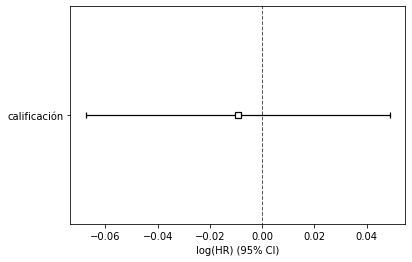

In [94]:
## Modelo de Cox de Riesgos proporcionales

cph = CoxPHFitter().fit(df, "tiempo", "género")
cph.print_summary()
cph.plot();

<lifelines.CoxPHFitter: fitted with 17 total observations, 0 right-censored observations>
             duration col = 'tiempo'
                event col = 'calificación'
      baseline estimation = breslow
   number of observations = 17
number of events observed = 17
   partial log-likelihood = -33.43
         time fit was run = 2023-03-17 03:59:05 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
género      0.20       1.23       0.51            -0.81             1.21                 0.45                 3.36

            cmp to    z    p   -log2(p)
covariate                              
género        0.00 0.39 0.69       0.53
---
Concordance = 0.50
Partial AIC = 68.85
log-likelihood ratio test = 0.16 on 1 df
-log2(p) of ll-ratio test = 0.53

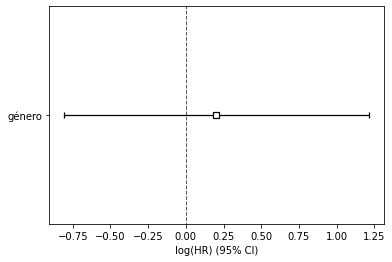

In [95]:
## Modelo de Cox de Riesgos proporcionales

cph = CoxPHFitter().fit(df, "tiempo", "calificación")
cph.print_summary()
cph.plot();

# Inciso h)

Interprete los coeficientes de género y calificación obtenidos por el modelo de cox, recuerde señalar: 1) si el coeficiente es significativo (se rechaza Ho), en  caso  de  ser  significativo  señala  si  aumentan  el  riesgo  de  entregar  el examen, y el tamaño del efecto. Recuerde añadir cph.plot() para ayudarse con la interpretación.

# HIPÓTESIS
H0: Las varibles no muestran relación o que el coeficiente no sea significativo.

Ha: Las variables muestran relación o que el coeficiente es significativo.

## Si P.Value <  $\alpha$, Rechazamos H0.

Para el género: tenemos un P.value: 0.69 y el alpha de: 0.05

Para la calificación: tenemos un P.value: 0.75 y el alpha de: 0.05

# RESPUESTA
## Conclusión: Con un 95% de confianza NO rechazamos H0, significa que las variables **calificación** y **género** no son significativas, es decir no muestran relación con el evento que es entregar el examen.

# Inciso i)
Utilice cph.plot_partial_effects_on_outcome(covariates='variable', values=[0,1]) para  estimar  las  funciones  de  supervivencia  de  alumnos  y alumnas  de  acuerdo  con  el  modelo  de  cox  ¿obtiene  resultados  similares  al inciso  e),  es  decir,  coincide  con  las  funciones  de  supervivencia de  Kaplan-Meier?

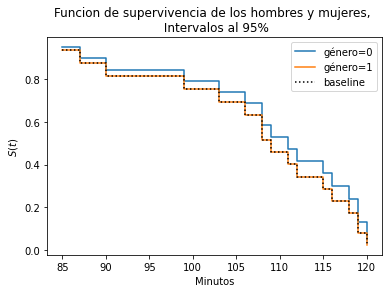

In [96]:
cph.plot_partial_effects_on_outcome(covariates='género', values=[0,1])
plt.title("Funcion de supervivencia de los hombres y mujeres, \n Intervalos al 95%")
plt.ylabel("$S(t)$")
plt.xlabel("Minutos")
plt.show()

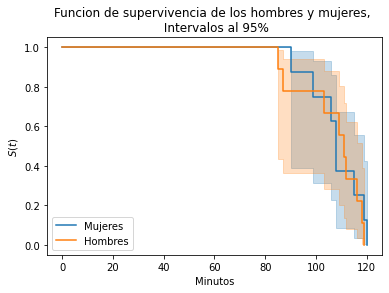

In [93]:
km_Mujeres.plot_survival_function(label="Mujeres")
km_Hombres.plot_survival_function(label="Hombres")
plt.title("Funcion de supervivencia de los hombres y mujeres, \n Intervalos al 95%")
plt.ylabel("$S(t)$")
plt.xlabel("Minutos")
plt.show()

#RESPUESTA

**Si se obtienen resultados similares al inciso e), es decir, coincide con las funciones de supervivencia de Kaplan-Meier**

# Inciso j)
Por último, con base en la interpretación del modelo de cox y la significancia de los coeficientes,  comente  si  el  profesor  tiene  razón  al  señalar  que  las alumnas  responden  en  menor  tiempo  el  examen,  y  si  el  profesor  tambien tiene razón al señalar que los que entregan el examen rápido no estudiaron y por tanto obtienen menores calificación.

#RESPUESTA

De acorde con el inciso f) demostramos que ambas funciones de supervivencia tanto la de hombres como la de mujeres son iguales, por ende no se puede afirmar que: **las alumnas tardan en responder menos el examen que los hombres**, y también confirmamos en el inciso h) que las variables de **género** y **calificación** no tienen relación o poseen un coeficiente significativo con la entrega del examen, por ende tampoco se puede confirmar que los alumnos que entregan más rapido el examen signifca que no estudiaron y por ende obtienen menos calificación.